#Authors
**Author 1 (name and surname):** Alan García Justel

**Author 2 (name and surname):** < Put your name and surname here >

# Preamble: download and unzip image folder

In [ ]:
!wget -O images.zip https://ehubox.ehu.eus/s/6i5HHiQMoBYySd8/download
!unzip images.zip

--2025-02-16 15:42:25--  https://ehubox.ehu.eus/s/6i5HHiQMoBYySd8/download
Resolving ehubox.ehu.eus (ehubox.ehu.eus)... 158.227.0.95
Connecting to ehubox.ehu.eus (ehubox.ehu.eus)|158.227.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1905055 (1.8M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.82M  1.11MB/s    in 1.6s    

2025-02-16 15:42:27 (1.11 MB/s) - ‘images.zip’ saved [1905055/1905055]

Archive:  images.zip
   creating: images/
  inflating: images/westconcordorthophoto.jpg  
  inflating: images/coins.png        
  inflating: images/donostia-city-hall-unregistered.png  
  inflating: images/donostia-city-hall.png  
  inflating: images/westconcordaerial.jpg  


#Exercise 1
Enter the following commands on the coins image:


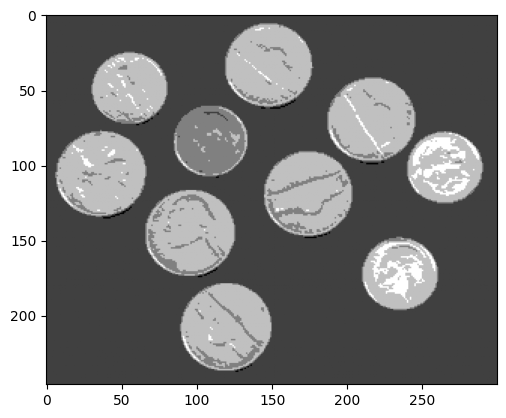

In [ ]:
import cv2
from matplotlib import pyplot as plt

b = cv2.imread( 'images/coins.png', cv2.IMREAD_GRAYSCALE )

b2 = cv2.divide(b,64)
bb2 = cv2.multiply(b2,64)

plt.imshow(bb2, cmap='gray', vmin=0, vmax=255 )
plt.show()

Comment on the result. **Q1.1:** Why is the result not equivalent to the original image? Replace the value 64 in the previous question with 32, and 16. **Q1.2:** What happens now? You might want to look at the resulting histograms to understand what’s going on.

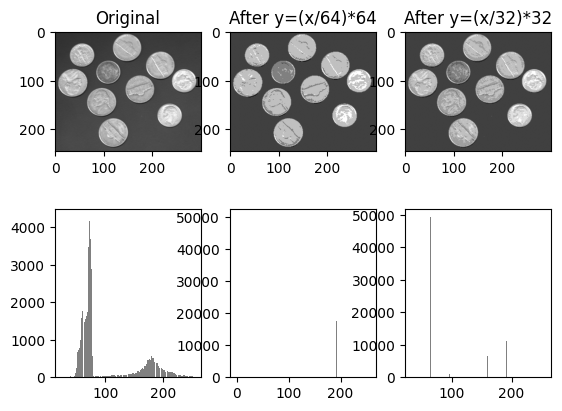

In [ ]:
b3 = cv2.divide(b,32)
bb3 = cv2.multiply(b3,32)

f, axes = plt.subplots(2, 3)
axes[0, 0].imshow(b, cmap='gray', vmin=0, vmax=255)
axes[1, 0].hist(b.ravel(), bins=256, color='gray')
axes[0, 0].set_title("Original")

axes[0, 1].imshow(bb2, cmap='gray', vmin=0, vmax=255)
axes[1, 1].hist(bb2.ravel(), bins=256, color='gray')
axes[0, 1].set_title("After y=(x/64)*64")

axes[0, 2].imshow(bb3, cmap='gray', vmin=0, vmax=255)
axes[1, 2].hist(bb3.ravel(), bins=256, color='gray')
axes[0, 2].set_title("After y=(x/32)*32")
plt.show()

## Answers

**Q1.1: Why is the result not equivalent to the original image?**

When you divide a grayscale image by 64, the pixel values, which originally range from 0 to 255, are scaled down to a new range of [0, 3.984375]. Since pixel values in digital images are typically represented as integers, these values are rounded down to the nearest whole number, resulting in a range of [0, 3]. This means the image now has only 4 possible grayscale values: 0, 1, 2, and 3.

When you multiply the image back by 64 to restore the original range of [0, 255], the pixel values are scaled up. However, because the intermediate values were rounded to just 4 levels (0, 1, 2, 3), the resulting image will only have 4 distinct grayscale colors: 0, 64, 128, and 192.

**Q1.2: Replace the value 64 in the previous question with 32, and 16. What happens now? You might want to look at the resulting histograms to understand what’s going on.**

It happens the same as before but the intermediate range after dividing by 32 is [0, 7.96875] wich means that there are now 8 possible grayscale values.


# Exercise 2
Load the cameraman picture and rotate it all the way to 360 degrees in steps of 5 degrees using `skimage.transform.rotate` and the `resize=False` option (which requests that the result be cropped to be the same size as the original image).

Repeat the process from the beginning three times, each time using a different interpolation method (`order: 0: Nearest-neighbor, 1: Bi-linear, 3: Bi-cubic`).

**Q2.1:** Which interpolation method provides the best results and why?

**Q2.2:** Are any of them providing the same image quality as the input image?

Check how to measure execution times in Python using `time.time()` and measure the rotation time using each interpolation method.

**Q2.3:** How do they perform in time?

[Nearest-Neighbor Rotations] Ellapsed time: 10.282710361s
[Bi-Linear Rotations] Ellapsed time: 1.259725217s


/usr/local/lib/python3.11/dist-packages/skimage/transform/_warps.py:444: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  return warp(


[Bi-Cubic Rotations] Ellapsed time: 14.122701993s


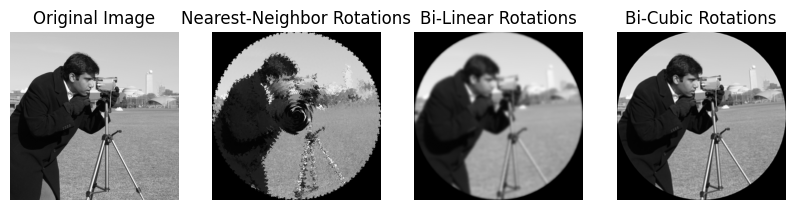

In [ ]:
from skimage import data
from skimage import transform
from matplotlib import pyplot as plt

import time

camera = data.camera() # load camera image from skimage

deg_step = 5
rotations = range(0, 360 +1, deg_step)
f, axes = plt.subplots(1, 4, figsize=(10, 10))

# Original Image
axes[0].imshow( camera, cmap='gray' )
axes[0].set_title(f"Original Image")
axes[0].axis('off')

# Nearest-Neighbor Rotations
rotated_camera = camera.copy()
st_time = time.time_ns()
for _ in rotations:
  rotated_camera = transform.rotate( rotated_camera, deg_step, resize=False, order=0)
fs_time = time.time_ns()
print(f"[Nearest-Neighbor Rotations] Ellapsed time: {(fs_time - st_time)/1e9}s")
axes[1].imshow( rotated_camera, cmap='gray' )
axes[1].set_title(f"Nearest-Neighbor Rotations")
axes[1].axis('off')

# Bi-Linear Rotations
rotated_camera = camera.copy()
st_time = time.time_ns()
for _ in rotations:
  rotated_camera = transform.rotate( rotated_camera, deg_step, resize=False, order=1)
fs_time = time.time_ns()
print(f"[Bi-Linear Rotations] Ellapsed time: {(fs_time - st_time)/1e9}s")
axes[2].imshow( rotated_camera, cmap='gray' )
axes[2].set_title(f"Bi-Linear Rotations")
axes[2].axis('off')

# Bi-Cubic Rotations
rotated_camera = camera.copy()
st_time = time.time_ns()
for _ in rotations:
  rotated_camera = transform.rotate( rotated_camera, deg_step, resize=False, order=2)
fs_time = time.time_ns()
print(f"[Bi-Cubic Rotations] Ellapsed time: {(fs_time - st_time)/1e9}s")
axes[3].imshow( rotated_camera, cmap='gray' )
axes[3].set_title(f"Bi-Cubic Rotations")
axes[3].axis('off')

plt.show()

## Answers
**Q2.1: Which interpolation method provides the best results and why?**

Bi-Cubic interpolation has the best results because it produces the smoothest image after the accumulative rotation process. This is mainly because the Nearest-Neighbor method doesn't consider the surrounding pixels when the pixel intensity is calculated, leading to a blocky and pixelated image; while, on the other hand, the bilinear method despite being smoother it is not as the bicubic one.

**Q2.2: Are any of them providing the same image quality as the input image?**

The Bi-Cubic one seems pretty close to the original one in terms of image quality.

**Q2.3: How do they perform in time?**

The Nearest-Neighbor rotations takes around 5 secons to complete while the Bilinear method takes below 1 second. This is probably because the implementation of the method. Wich is clear is that the slower method is the Bicubic one.

# Exercise 3
Load the images `donostia-city-hall.png` and `donostia-city-hall-unregistered.png` and try to align them using manually selected control points and the different transform options permitted by `skimage.transform.estimate_transform()` or `cv2.get…Transform()`.

**Q3.1:** Which transforms are able to correct the distortion between both images?

**Q3.2:** What is the minimum number of points you need in the successful registrations?

When using OpenCV, remember you have three different functions to calculate the transform, each of them admitting a different number of control points.

In [ ]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 930.5 kB/s eta 0:00:00


In [ ]:
# Load images. The objective is to align the second image with the first one
cityhall = cv2.imread("images/donostia-city-hall.png")
cityhall = cv2.cvtColor(cityhall, cv2.COLOR_BGR2RGB)

cityhall_un = cv2.imread("images/donostia-city-hall-unregistered.png")
cityhall_un = cv2.cvtColor(cityhall_un, cv2.COLOR_BGR2RGB)

In [ ]:
 # Manually select the destination points from image 1 and the source points from the image 2.
 # The objective is to move the source points posittions to the destination points

import mpld3
from mpld3 import plugins

# plot together both images (as before)
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow( cityhall )
axes[0].set_title( 'Image 1' )
axes[1].imshow( cityhall_un )
axes[1].set_title( 'Image 2' )
plt.tight_layout()

# use mpld3 plugin to display mouse position
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

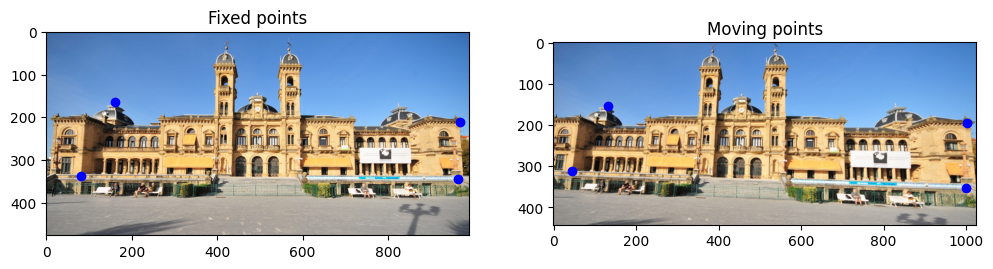

In [ ]:
import numpy as np


# donostia-city-hall
dst_points = np.array([ [80.9, 338],
                        [162, 164],
                        [969, 211],
                        [965, 345]
                        ], dtype= "float32" )
# donostia-city-hall-unregistered
src_points = np.array([ [44.0, 312],
                        [133, 153],
                        [1002, 195],
                        [1000, 352]
                       ], dtype= "float32" )

# Show selected points
f, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].imshow(cityhall)
axes[0].scatter( x=dst_points[:,0], y=dst_points[:,1], c='b' )
axes[0].set_title("Fixed points")
axes[1].imshow(cityhall_un)
axes[1].scatter( x=src_points[:,0], y=src_points[:,1], c='b' )
axes[1].set_title("Moving points")

plt.show()

Perspective transformation matrix M: [[ 1.29638547e+00  1.81319659e-01 -2.63061174e+01]
 [ 6.60607240e-02  1.22418015e+00 -2.00842217e+01]
 [ 3.08241198e-04  2.10348328e-04  1.00000000e+00]]


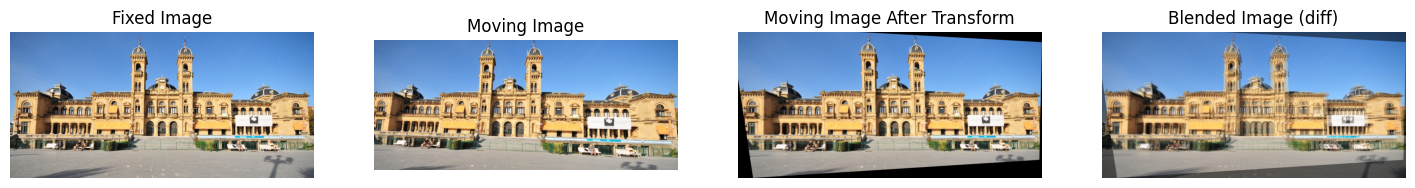

In [ ]:
# Get perspective transfor for rotating the image
M = cv2.getPerspectiveTransform( src_points, dst_points )
print(f"Perspective transformation matrix M: {M}")

height, width, _ = cityhall.shape
transformed_img = cv2.warpPerspective( cityhall_un, M, (width, height))

blended = cv2.addWeighted(transformed_img, 0.5, cityhall, 0.5, 0)

f, axes = plt.subplots(1, 4, figsize=(18, 12))
axes[0].imshow(cityhall)
axes[0].set_title("Fixed Image")
axes[0].axis('off')

axes[1].imshow(cityhall_un)
axes[1].set_title("Moving Image")
axes[1].axis('off')

axes[2].imshow(transformed_img)
axes[2].set_title("Moving Image After Transform")
axes[2].axis('off')

axes[3].imshow(blended)
axes[3].set_title("Blended Image (diff)")
axes[3].axis('off')

plt.show()


## Answers
**Q3.1: Which transforms are able to correct the distortion between both images?**

As the most significant values of the computed proyective matrix are at the (0, 0) and (1, 1) positions, which are the rotations in x and y respectively, the main transformation made to the image to correct the distorsion is a rotation.

\begin{matrix}
1.29638547e+00  & 1.81319659e-01 & -2.63061174e+01 \\
6.60607240e-02  & 1.22418015e+00 & -2.00842217e+01 \\
3.08241198e-04  & 2.10348328e-04 &  1.00000000e+00 \\
\end{matrix}

**Q3.2: What is the minimum number of points you need in the successful registrations?**

The minimun number of points required to correct a distorsion between two images depends on the type of distorsion:
- A translation only requires 1 reference point on the images.
- A similarity transform (scaling + rotation + translation) requires 2 points.
- An affine transformation requires 3 points.
- A projective transformation requires 4 points (8 DOF).

In this case, since the distortion is a rotation, the minimum number of points required is 2.

# Egela submission
Copy this notebook to your Drive and solve the proposed exercises there.

Rename the notebook as `assignment-4-name1-surname1-name2-surname2.ipynb` (replace *name1-surname1* and *name2-surname2* with team member names and surnames).

Use the "share" button and make sure you configure such that "Anyone on the Internet with this link can view".

Copy the link provided by the "share" menu and paste it here. Only one member of the team should submit the notebook

<font color=red>**Important**</font>: Make sure the notebook is <u>fully run</u> with the "traces" visible (run times) and <u>all questions have been answered</u> when you submit.

**Submission deadline:** Sunday, February 16th 2025, 0:00h.